# Survival Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes      # Lifeline package for the Survival Analysis
%pylab inline
figsize(12,6)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Example with a fictitious data

<AxesSubplot:xlabel='timeline'>

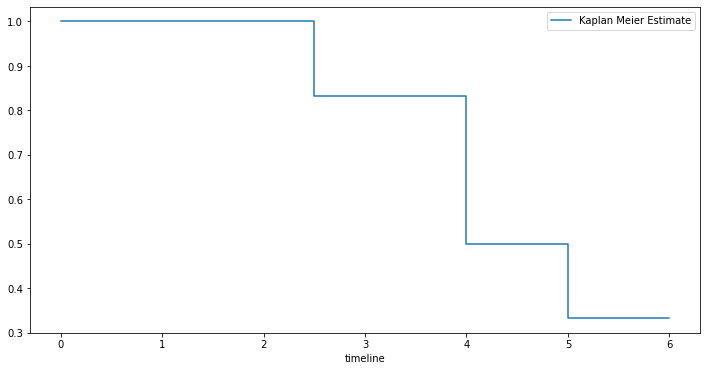

In [3]:
from lifelines import KaplanMeierFitter

## Example Data 
durations = [5,6,6,2.5,4,4]
event_observed = [1, 0, 0, 1, 1, 1]

## create an kmf object
kmf = KaplanMeierFitter() 

## Fit the data into the model
kmf.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
kmf.plot(ci_show=False) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.

## Real World Example 

### We will be using Telco Customer Churn data from Kaggle
https://www.kaggle.com/blastchar/telco-customer-churn/

In [4]:
##  create a dataframe=
df= pd.read_csv("/Users/mm679j/Documents/2022-MMA831-Python/data/telco_churn.csv")


In [5]:
## Have a first look at the data
df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
## Data Types and Missing Values in Columns
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
## Convert TotalCharges to numeric
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

## Replace yes and No in the Churn column to 1 and 0. 1 for the event and 0 for the censured data.
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [8]:
## after converting the column TotalCharges to numeric
df.info()  ## Column TotalCharges is having missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
## Impute the null value with the median value

df.TotalCharges.fillna(value=df['TotalCharges'].median(),inplace=True)

In [10]:
## Create a list of Categorical Columns
cat_cols= [i  for i in df.columns if df[i].dtype==object]
cat_cols.remove('customerID')  ## customerID has been removed because it is unique for all the rows.

In [76]:
## lets have a look at the categories and their distribution in all the categorical columns.

for i in cat_cols:
    print('Column Name: ',i)
    print(df[i].value_counts())
    print('-----------------------------')

Column Name:  gender
Male      3555
Female    3488
Name: gender, dtype: int64
-----------------------------
Column Name:  Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
-----------------------------
Column Name:  Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
-----------------------------
Column Name:  PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
-----------------------------
Column Name:  MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
-----------------------------
Column Name:  InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
-----------------------------
Column Name:  OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
-----------------------------
Column Name:  OnlineBackup
No                     3088
Yes     

<AxesSubplot:xlabel='timeline'>

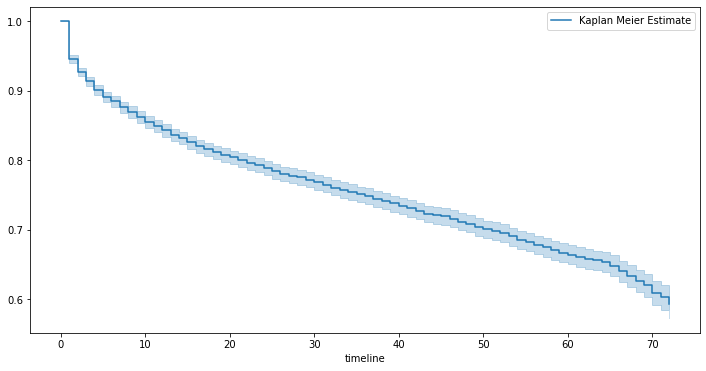

In [11]:
## Lets create an overall KaplanMeier curve, without breaking it into groups of covariates.

## Import the library
from lifelines import KaplanMeierFitter


durations = df['tenure'] ## Time to event data of censored and event data
event_observed = df['Churn']  ## It has the churned (1) and censored is (0)

## create a kmf object as km
km = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
km.fit(durations, event_observed,label='Kaplan Meier Estimate')

## Create an estimate
km.plot()

## Lets create Kaplan Meier Curves for Cohorts

<AxesSubplot:xlabel='timeline'>

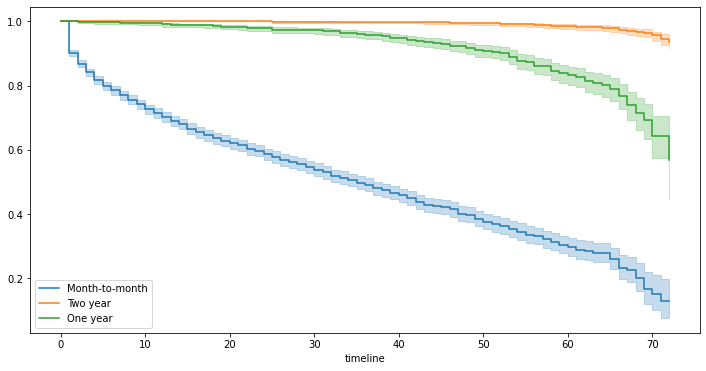

In [12]:
kmf = KaplanMeierFitter() 


T = df['tenure']     ## time to event
E = df['Churn']      ## event occurred or censored


groups = df['Contract']             ## Create the cohorts from the 'Contract' column
ix1 = (groups == 'Month-to-month')   ## Cohort 1
ix2 = (groups == 'Two year')         ## Cohort 2
ix3 = (groups == 'One year')         ## Cohort 3


kmf.fit(T[ix1], E[ix1], label='Month-to-month')    ## fit the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='Two year')         ## fit the cohort 2 data
ax1 = kmf.plot(ax=ax)


kmf.fit(T[ix3], E[ix3], label='One year')        ## fit the cohort 3 data
kmf.plot(ax=ax1)                                 ## Plot the KM curve for three cohort on same x and y axis

<AxesSubplot:xlabel='timeline'>

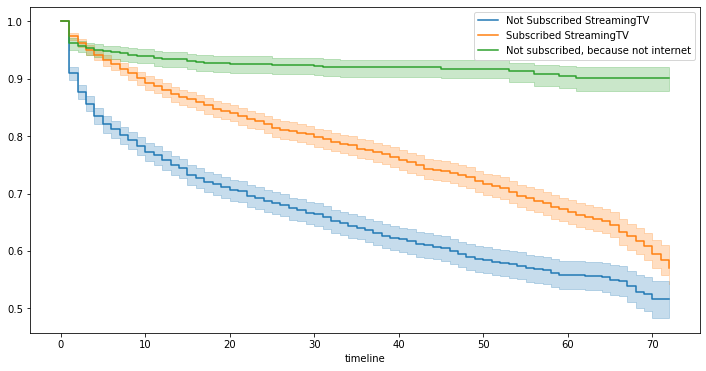

In [33]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## Two Cohorts are compared. 1. Streaming TV Not Subsribed by Users, 2. Streaming TV subscribed by the users.
groups = df['StreamingTV']   
i1 = (groups == 'No')      ## group i1 , having the pandas series for the 1st cohort
i2 = (groups == 'Yes')     ## group i2 , having the pandas series for the 2nd cohort
i3 = (groups == 'No internet service')


## fit the model for 1st cohort
kmf1.fit(T[i1], E[i1], label='Not Subscribed StreamingTV')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(T[i2], E[i2], label='Subscribed StreamingTV')
kmf1.plot(ax=a1)

## fit the model for 2nd cohort
kmf1.fit(T[i3], E[i3], label='Not subscribed, because not internet')
kmf1.plot(ax=a1)

## Cox Proportional Hazard Model (Survival Regression)

In [59]:
from lifelines import CoxPHFitter     

In [64]:
# Let's take a subset of columns from full data to see how CoxPH works 
df_r= df.loc[:,['tenure','Churn','gender','PaperlessBilling','Partner','PaymentMethod','Contract','Dependents','PhoneService','MonthlyCharges','SeniorCitizen']]
df_r.head() ## have a look at the data 

,tenure,Churn,gender,PaperlessBilling,Partner,PaymentMethod,Contract,Dependents,PhoneService,MonthlyCharges,SeniorCitizen
0,1,0,Female,Yes,Yes,Electronic check,Month-to-month,No,No,29.85,0
1,34,0,Male,No,No,Mailed check,One year,No,Yes,56.95,0
2,2,1,Male,Yes,No,Mailed check,Month-to-month,No,Yes,53.85,0
3,45,0,Male,No,No,Bank transfer (automatic),One year,No,No,42.30,0
4,2,1,Female,Yes,No,Electronic check,Month-to-month,No,Yes,70.70,0


In [65]:
## Create dummy variables
df_dummy = pd.get_dummies(df_r, drop_first=True)
df_dummy.head()

,tenure,Churn,MonthlyCharges,SeniorCitizen,gender_Male,PaperlessBilling_Yes,Partner_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year,Dependents_Yes,PhoneService_Yes
0,1,0,29.85,0,0,1,1,0,1,0,0,0,0,0
1,34,0,56.95,0,1,0,0,0,0,1,1,0,0,1
2,2,1,53.85,0,1,1,0,0,0,1,0,0,0,1
3,45,0,42.30,0,1,0,0,0,0,0,1,0,0,0
4,2,1,70.70,0,0,1,0,0,1,0,0,0,0,1


In [66]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()   ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'tenure', event_col='Churn')   ## Fit the data to train the model
cph.print_summary()    ## HAve a look at the significance of the features

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -14155.44
         time fit was run = 2022-10-03 00:01:57 UTC

---
                                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                                     
MonthlyCharges                         -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
SeniorCitizen                          -0.02       0.98       0.06            -0.13             0.09                 0.88                 1.09
gender_Male                            -0.05       0.95       0.05            -0.14             0.04                 0.87                 1.04
PaperlessBilling_Yes                    0.24       1.27       0.06             0.13             0.35                 1.14                 1.42
Partner_Yes                            -0.57       0.56       0.05            -0.68            -0.47                 0.51                 0.63
PaymentMethod_Credit card (automatic)  -0.07       0.93       0.09            -0.25             0.11                 0.78                 1.11
PaymentMethod_Electronic check          0.69       2.00       0.07             0.56             0.83                 1.74                 2.30
PaymentMethod_Mailed check              0.52       1.68       0.09             0.35             0.69                 1.41                 2.00
Contract_One year                      -1.98       0.14       0.09            -2.15            -1.82                 0.12                 0.16
Contract_Two year                      -3.87       0.02       0.16            -4.18            -3.55                 0.02                 0.03
Dependents_Yes                         -0.13       0.88       0.07            -0.26             0.00                 0.77                 1.00
PhoneService_Yes                        0.19       1.21       0.09             0.01             0.37                 1.01                 1.44

                                        cmp to      z      p   -log2(p)
covariate                                                              
MonthlyCharges                            0.00  -1.72   0.08       3.56
SeniorCitizen                             0.00  -0.39   0.70       0.52
gender_Male                               0.00  -1.16   0.24       2.03
PaperlessBilling_Yes                      0.00   4.21 <0.005      15.29
Partner_Yes                               0.00 -10.48 <0.005      82.92
PaymentMethod_Credit card (automatic)     0.00  -0.77   0.44       1.17
PaymentMethod_Electronic check            0.00   9.80 <0.005      72.94
PaymentMethod_Mailed check                0.00   5.86 <0.005      27.70
Contract_One year                         0.00 -23.31 <0.005     396.76
Contract_Two year                         0.00 -24.17 <0.005     426.17
Dependents_Yes                            0.00  -1.91   0.06       4.15
PhoneService_Yes                          0.00   2.07   0.04       4.71
---
Concordance = 0.84
Partial AIC = 28334.88
log-likelihood ratio test = 2995.19 on 12 df
-log2(p) of ll-ratio test = inf

<AxesSubplot:xlabel='log(HR) (95% CI)'>

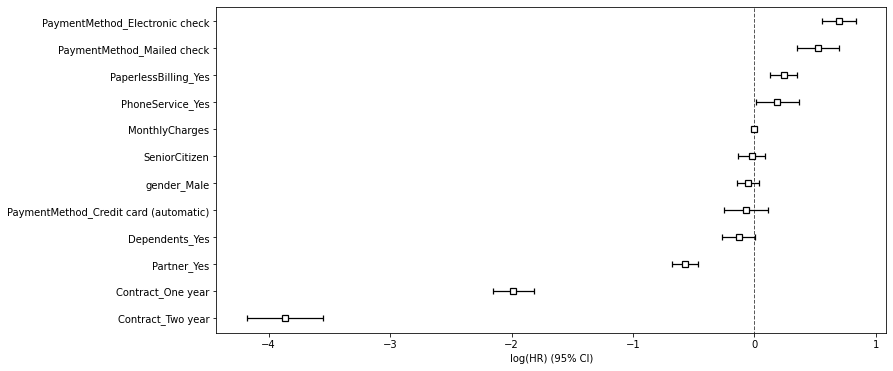

In [67]:
cph.plot()

In [19]:
## Check all the methods and attributes associated with the cph object, to get a sense of what else you can call
dir(cph)

['AIC_',
 'AIC_partial_',
 '_ALLOWED_RESIDUALS',
 '_FAST_MEDIAN_PREDICT',
 '_KNOWN_MODEL',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_batch_mode',
 '_censoring_type',
 '_central_values',
 '_check_values_post_fitting',
 '_check_values_pre_fitting',
 '_choose_gradient_calculator',
 '_class_name',
 '_clusters',
 '_compute_baseline_cumulative_hazard',
 '_compute_baseline_hazard',
 '_compute_baseline_hazards',
 '_compute_baseline_survival',
 '_compute_central_values_of_raw_training_data',
 '_compute_confidence_intervals',
 '_compute_delta_beta',
 '_compute_deviance',
 '_compute_martingale',
 '_compute_p_values',
 '_compute_sandwich_estimator',
 '_

In [20]:
## We want to see the Survival curve at the customer level. Therefore, we have selected 6 customers (rows 5 till 9).

tr_rows = df_dummy.iloc[5:10, 2:]
tr_rows

,MonthlyCharges,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,StreamingTV_No internet service,StreamingTV_Yes
5,99.65,0,0,0,0,1,0,1
6,89.10,0,1,0,1,1,0,1
7,29.75,0,0,0,0,0,0,0
8,104.80,0,0,1,0,1,0,1
9,56.15,0,1,0,1,1,0,0


In [21]:
## Lets predict the survival curve for the selected customers. 
cph.predict_survival_function(tr_rows)

,5,6,7,8,9
0.0,1.000000,1.000000,1.000000,1.000000,1.000000
1.0,0.938943,0.952209,0.921628,0.973824,0.918728
2.0,0.917315,0.935115,0.894221,0.964317,0.890368
3.0,0.900133,0.921472,0.872583,0.956671,0.868002
4.0,0.884537,0.909038,0.853048,0.949657,0.847828
...,...,...,...,...,...
68.0,0.502361,0.585595,0.409905,0.748382,0.396028
69.0,0.491407,0.575645,0.398364,0.741468,0.384453
70.0,0.474358,0.560060,0.380551,0.730526,0.366615
71.0,0.463062,0.549665,0.368854,0.723151,0.354917


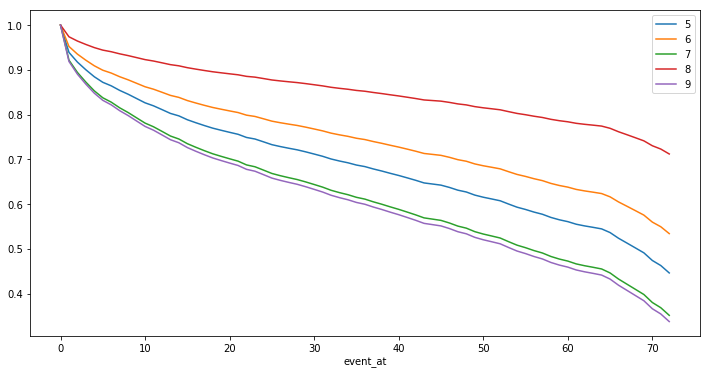

In [92]:
## We can also plot the curves for these customers
cph.predict_survival_function(tr_rows).plot()